# Linear Regression: Inverse Matrix Method

This script explores how to accomplish linear regression with TensorFlow using the matrix inverse.

Given the system $ A \cdot x = y $, the matrix inverse way of linear regression (equations for overdetermined systems) is given by solving for x as follows.

$$x = \left( A^{T} \cdot A \right)^{-1} \cdot A^{T} \cdot y$$

As a reminder, here, $x$ is our parameter matrix (vector of length $F+1$, where $F$ is the number of features). Here, $A$, our design matrix takes the form

$$
A=
\begin{bmatrix}
    1 & x_{11} & x_{12} & \dots  & x_{1F} \\
    1 & x_{21} & x_{22} & \dots  & x_{2F} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n1} & x_{n2} & \dots  & x_{nF}
\end{bmatrix}
$$

Where $F$ is the number of independent features, and $n$ is the number of points.  For an overdetermined system, $n>F$. Remember that one observed point in our system will have length $F+1$ and the $i^{th}$ point will look like

$$point_{i} = \left( y_{i}, x_{i1}, x_{i2}, \dots, x_{iF} \right)$$

For this recipe, we will consider only a 2-dimensional system ($F=1$), so that we can plot the results at the end.

We start by loading the necessary libraries.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

Next we start a graph session.

In [8]:
sess = tf.Session()

For illustration purposes, we randomly generate data to fit.

The x-values will be a sequence of 100 evenly spaced values between 0 and 100.

The y-values will fit to the line: $y=x$, but we will add normally distributed error according to $N(0,1)$.

In [9]:
# Create the data
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

We create the design matrix, $A$, which will be a column of ones and the x-values.

In [10]:
# Create design matrix
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))

We now create the y-values as a matrix with Numpy.

After we have the y-values and the design matrix, we create tensors from them.

In [11]:
# Format the y matrix
y = np.transpose(np.matrix(y_vals))

# Create tensors
A_tensor = tf.constant(A)
y_tensor = tf.constant(y)

Now we solve for the parameter matrix with TensorFlow operations.

In [12]:
# Matrix inverse solution
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, y_tensor)

Run the solutions and extract the slope and intercept from the parameter matrix.

In [13]:
solution_eval = sess.run(solution)

# Extract coefficients
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

Now we print the solution we found and create a best fit line.

In [14]:
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

slope: 0.986121458094
y_intercept: 0.0436606277099


We use Matplotlib to plot the results.

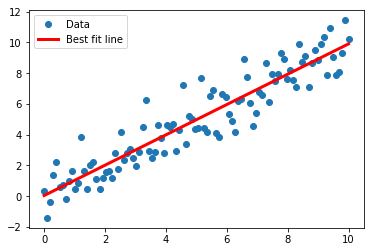

In [15]:
# Plot the results
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()

In [16]:
import os
merged = tf.summary.merge_all(key='summaries')
if not os.path.exists('tensorboard_logs/'):
    os.makedirs('tensorboard_logs/')

my_writer = tf.summary.FileWriter('tensorboard_logs/', sess.graph)